##House Price Prediction using supervised learning

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
dff=pd.read_csv(file_name)

In [2]:
dff.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


####Q1. Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. 

In [3]:
dff.drop(['id'], axis = 1, inplace=True)
dff.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [4]:
dff.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


####Q2. Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> and 3 other features

####Q3. Evaluate the model for accuracy using the methods taught in class

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dff, dff, test_size=.2,random_state=4);

from sklearn import linear_model
regr = linear_model.LinearRegression()

#####Feature 1: Square footage of the home 

Coefficients:  [[281.83375216]]
Intercept:  [-45850.76735561]
Mean absolute error: 8.02
Residual sum of squares (MSE): 3093754.96


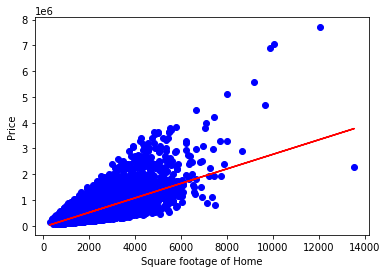

In [6]:
train_x = np.asanyarray(X_train[['sqft_living']])
train_y = np.asanyarray(X_train[['price']])
regr.fit(train_x, train_y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

plt.scatter(X_train.sqft_living, X_train.price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Square footage of Home")
plt.ylabel("Price")

test_x = np.asanyarray(X_test[['sqft_living']])
test_y = np.asanyarray(X_test[['price']])
test_y_ = regr.predict(test_x) 
rows=len(dff.axes[0])
mae=np.mean(np.absolute(test_y_ - test_y))/rows
mse=np.mean((test_y_ - test_y) ** 2)/rows
print("Mean absolute error: %.2f" % mae)
print("Residual sum of squares (MSE): %.2f" % mse)

Inference:  This shows that the accuracy of this algorithm with the given feature set is very low.

#####Feature 2: Grade

Coefficients:  [[209349.23305535]]
Intercept:  [-1062636.76835037]
Mean absolute error: 8.07
Residual sum of squares (MSE): 3326854.93


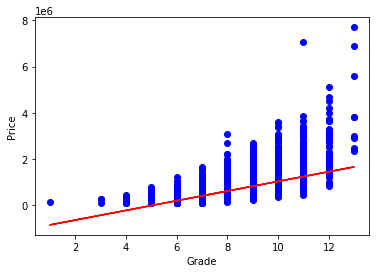

In [7]:

train_x = np.asanyarray(X_train[['grade']])
train_y = np.asanyarray(X_train[['price']])
regr.fit(train_x, train_y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

plt.scatter(X_train.grade, X_train.price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Grade")
plt.ylabel("Price")

test_x = np.asanyarray(X_test[['grade']])
test_y = np.asanyarray(X_test[['price']])
test_y_ = regr.predict(test_x) 
rows=len(dff.axes[0])
mae=np.mean(np.absolute(test_y_ - test_y))/rows
mse=np.mean((test_y_ - test_y) ** 2)/rows
print("Mean absolute error: %.2f" % mae)
print("Residual sum of squares (MSE): %.2f" % mse)

Inference: This shows that the accuracy of this algorithm with the given feature set is very low.

##### Feature 3: Square footage of the lot

Coefficients:  [[0.7739767]]
Intercept:  [528081.1404475]
Mean absolute error: 10.63
Residual sum of squares (MSE): 5927072.62


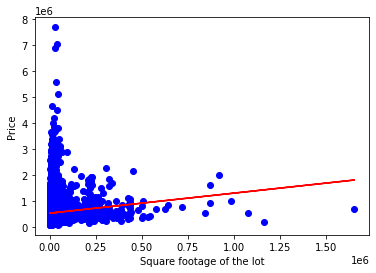

In [8]:
train_x = np.asanyarray(X_train[['sqft_lot']])
train_y = np.asanyarray(X_train[['price']])
regr.fit(train_x, train_y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

plt.scatter(X_train.sqft_lot, X_train.price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Square footage of the lot")
plt.ylabel("Price")

test_x = np.asanyarray(X_test[['sqft_lot']])
test_y = np.asanyarray(X_test[['price']])
test_y_ = regr.predict(test_x) 
rows=len(dff.axes[0])
mae=np.mean(np.absolute(test_y_ - test_y))/rows
mse=np.mean((test_y_ - test_y) ** 2)/rows
print("Mean absolute error: %.2f" % mae)
print("Residual sum of squares (MSE): %.2f" % mse)

Inference: This shows that the accuracy of this algorithm with the given feature set is very low.

#####Feature 4: Living room area in 2015

Coefficients:  [[313.05813605]]
Intercept:  [-81508.13938323]
Mean absolute error: 8.51
Residual sum of squares (MSE): 3781123.17


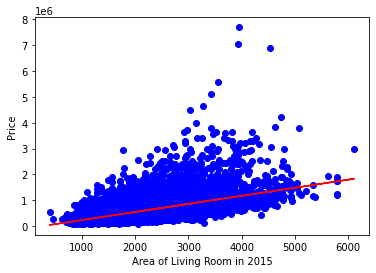

In [9]:
train_x = np.asanyarray(X_train[['sqft_living15']])
train_y = np.asanyarray(X_train[['price']])
regr.fit(train_x, train_y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

plt.scatter(X_train.sqft_living15, X_train.price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Area of Living Room in 2015")
plt.ylabel("Price")

test_x = np.asanyarray(X_test[['sqft_living15']])
test_y = np.asanyarray(X_test[['price']])
test_y_ = regr.predict(test_x) 
rows=len(dff.axes[0])
mae=np.mean(np.absolute(test_y_ - test_y))/rows
mse=np.mean((test_y_ - test_y) ** 2)/rows
print("Mean absolute error: %.2f" % mae)
print("Residual sum of squares (MSE): %.2f" % mse)

Inference: This shows that the accuracy of this algorithm with the given feature set is very low.